### Tennis Ace

#### Overview
This project is slightly different than others you have encountered thus far on Codecademy. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you’ll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals
You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

##### Load the data

In [2]:
df = pd.read_csv('tennis_stats.csv')

In [3]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
df.shape

(1721, 24)

In [5]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

##### Exploratory Analysis

In [6]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.00000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,0.565386,49.112144,198.30796,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,0.119426,56.630264,221.29607,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,0.520000,6.000000,22.00000,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,0.590000,23.000000,86.00000,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,0.630000,80.000000,349.00000,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,1.000000,309.000000,910.00000,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [7]:
df.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,-0.006154,-0.071885,-0.108405,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,0.087945,-0.005477,0.071776,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,0.405751,0.373321,0.375465,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,0.048347,0.244592,0.261871,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,0.340147,0.235941,0.296480,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,0.073867,0.193233,0.209937,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,0.282672,0.819031,0.863648,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,-0.015956,0.075320,0.083155,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,0.271783,0.917645,0.972449,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,0.247996,0.906391,0.978824,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


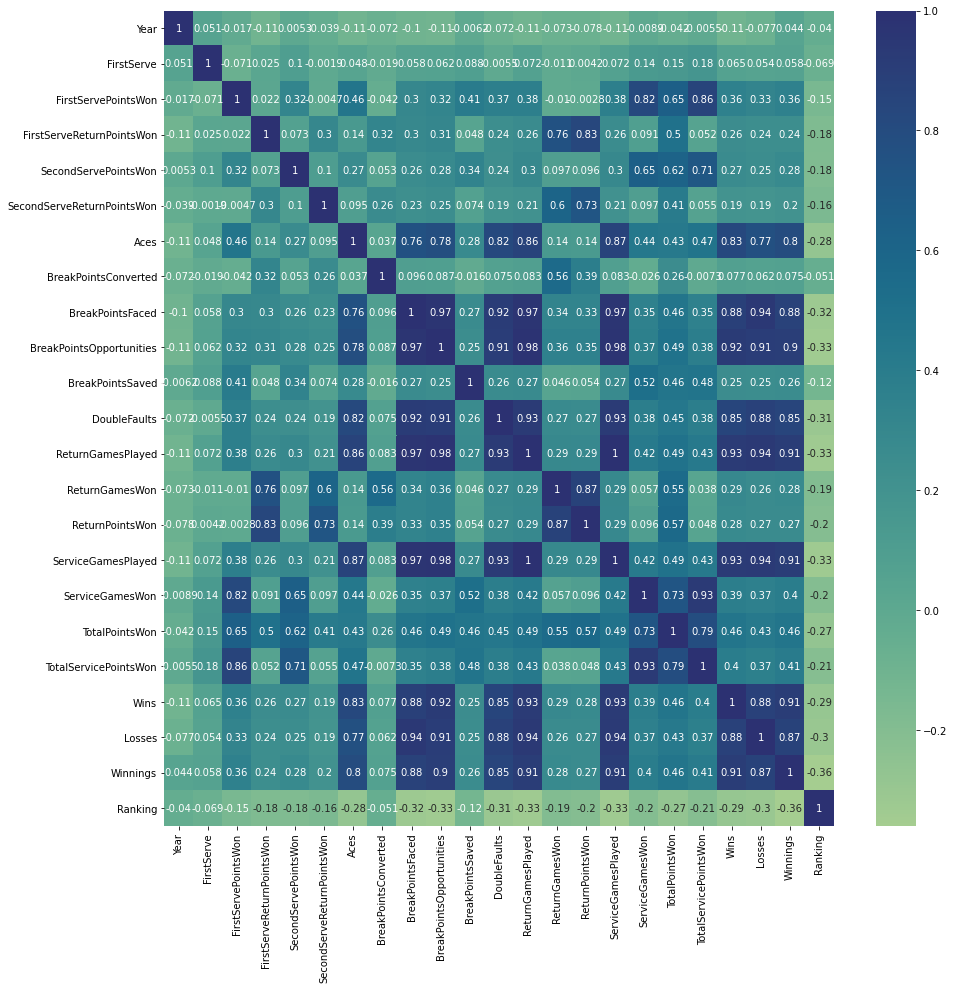

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr('pearson'), annot= True,cmap='crest')
plt.show()

In [9]:
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs = sorted_pairs[((sorted_pairs) >= 0.75) & ((sorted_pairs) < 1)]
sorted_pairs.tail(20)

TotalServicePointsWon     ServiceGamesWon             0.934764
ServiceGamesWon           TotalServicePointsWon       0.934764
ServiceGamesPlayed        Losses                      0.935182
Losses                    ServiceGamesPlayed          0.935182
ReturnGamesPlayed         Losses                      0.936755
Losses                    ReturnGamesPlayed           0.936755
                          BreakPointsFaced            0.943309
BreakPointsFaced          Losses                      0.943309
                          ServiceGamesPlayed          0.971296
ServiceGamesPlayed        BreakPointsFaced            0.971296
BreakPointsFaced          ReturnGamesPlayed           0.972449
ReturnGamesPlayed         BreakPointsFaced            0.972449
BreakPointsOpportunities  BreakPointsFaced            0.973352
BreakPointsFaced          BreakPointsOpportunities    0.973352
BreakPointsOpportunities  ServiceGamesPlayed          0.978278
ServiceGamesPlayed        BreakPointsOpportunities    0

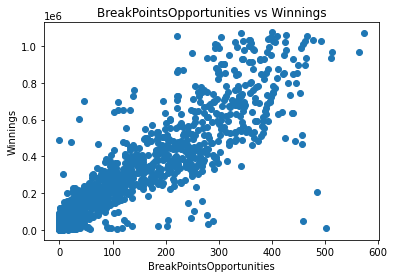

In [10]:
plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()

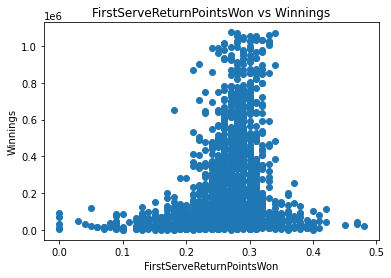

In [11]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()

#### Single feature linear regressions

In [12]:
def single_feature_regression(x,y):
    features_train, features_test, outcome_train, outcome_test = train_test_split(x, y, test_size=0.2, random_state=1)
    model = LinearRegression()
    model.fit(features_train,outcome_train)
    print('Predicting Winnings with Test Score:', model.score(features_test,outcome_test))
    print('Column(s) used in prediction: ', x.columns)
    winnings_prediction = model.predict(features_test)
    plt.scatter(outcome_test,winnings_prediction, alpha=0.4)
    plt.title(f'Predicted Winnings vs. Actual Winnings - %s Feature(s)' % (len(x.columns)))
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

Predicting Winnings with Test Score: 0.7790768695631647
Column(s) used in prediction:  Index(['BreakPointsOpportunities'], dtype='object')


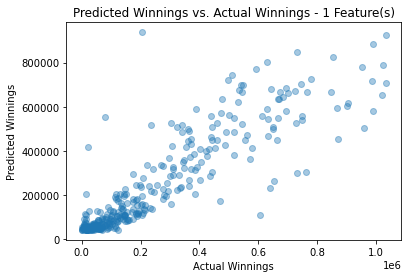

In [13]:
BreakPointsOpportunities = df[['BreakPointsOpportunities']]
winnings = df[['Winnings']]
single_feature_regression(BreakPointsOpportunities,winnings)

Predicting Winnings with Test Score: 0.06392361682772452
Column(s) used in prediction:  Index(['FirstServeReturnPointsWon'], dtype='object')


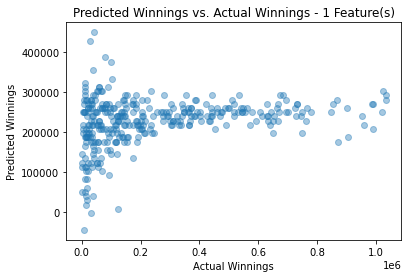

In [14]:
FirstServeReturnPointsWon = df[['FirstServeReturnPointsWon']]
winnings = df[['Winnings']]
single_feature_regression(FirstServeReturnPointsWon,winnings)

#### Two feature linear regressions

Predicting Winnings with Test Score: 0.779104617243723
Column(s) used in prediction:  Index(['FirstServeReturnPointsWon', 'BreakPointsOpportunities'], dtype='object')


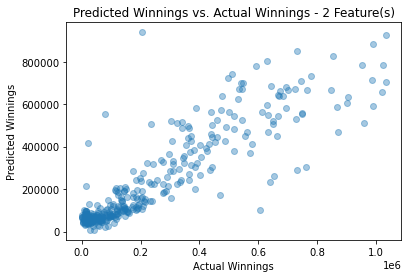

In [15]:
features = df[['FirstServeReturnPointsWon','BreakPointsOpportunities']]
winnings = df[['Winnings']]
single_feature_regression(features,winnings)

#### Multiple feature linear regressions

Predicting Winnings with Test Score: 0.8149220333672944
Column(s) used in prediction:  Index(['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
       'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed',
       'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed',
       'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon'],
      dtype='object')


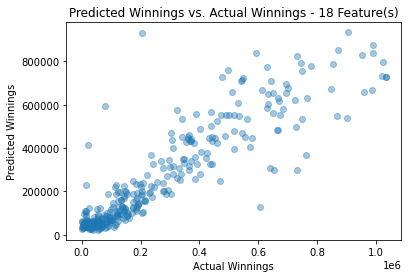

In [16]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
winnings = df[['Winnings']]
single_feature_regression(features,winnings)